# 라이브러리 추가

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# 데이터 로드하기

In [2]:
data = pd.read_csv('../data/Admission_Predict_Ver1.1.csv')

# EDA

## 데이터 기본 정보 확인

In [3]:
print(data.head(3))
print(data.info())
print(data.columns.values)

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500

데이터 세트에는 석사 프로그램 지원 시 중요하다고 여겨지는 여러 매개변수가 포함되어 있습니다.

포함된 매개변수는 다음과 같습니다.

---

GRE Scores ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 )

- GRE Score : GRE 점수 (340점 만점)
- TOELF Score : TOEFL 점수 (120점 만점)
- University Rating : 대학 평가 (5점 만점)
- SOP : 목적서 및 추천서 강점 (5점 만점)
- CGPA : 학부 GPA (10점 만점)
- Research : 연구 경험 (0 또는 1)
- Chance of Admit : 입학 가능성 (0~1)

## 데이터 분포 확인 (히스토그램)

array([[<Axes: title={'center': 'Serial No.'}>,
        <Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>],
       [<Axes: title={'center': 'University Rating'}>,
        <Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>],
       [<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit '}>]], dtype=object)

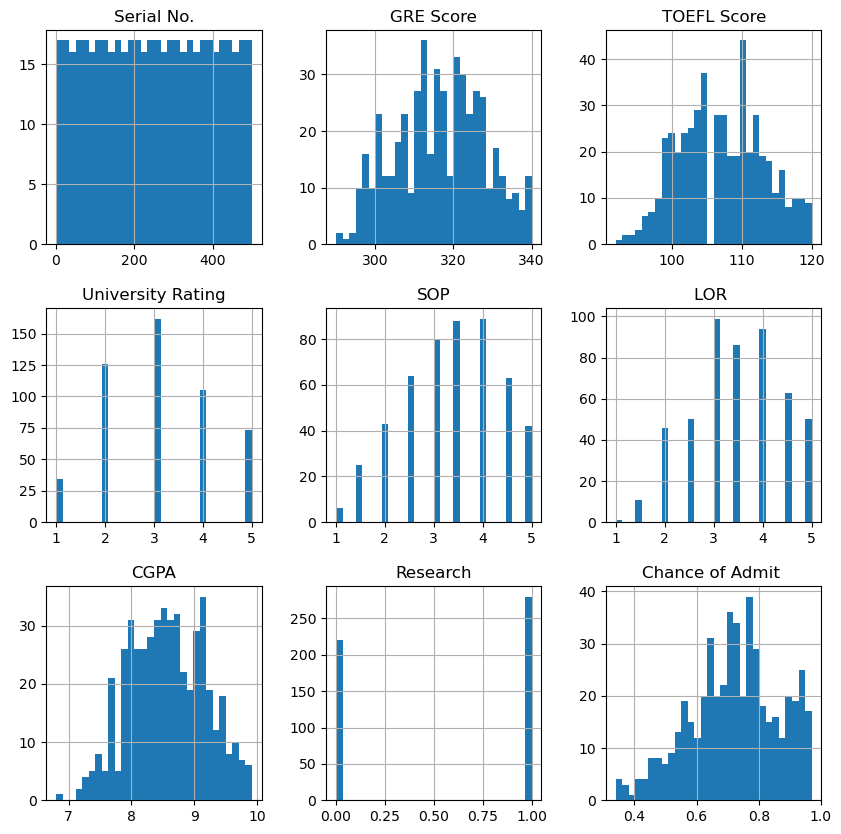

In [4]:
data.hist(bins=30,figsize=(10,10))

## 결측치 확인

In [5]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## 상관관계 분석

<Axes: >

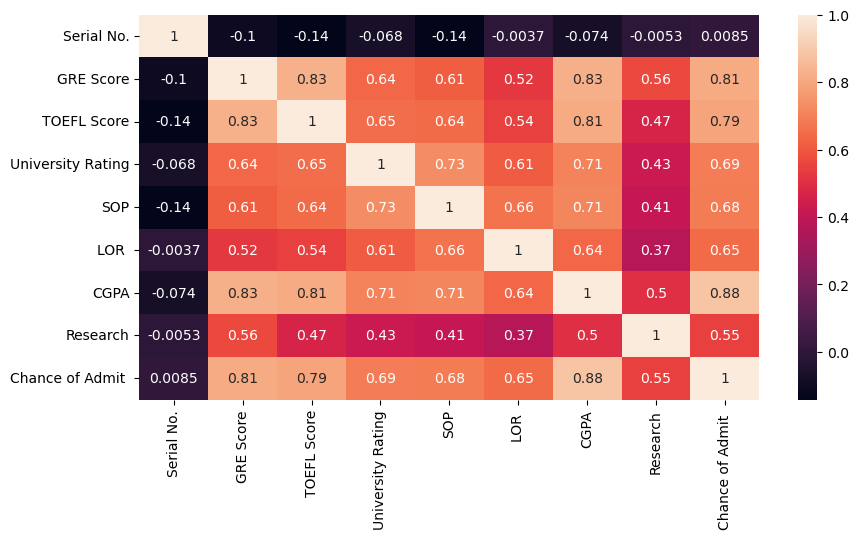

In [6]:
plt.figure(figsize=(10,5))
data_corr = data.corr()
pal = sns.diverging_palette(127.7, 12.2, l=53.4, n=255, center="dark")
sns.heatmap(data_corr,annot=True)

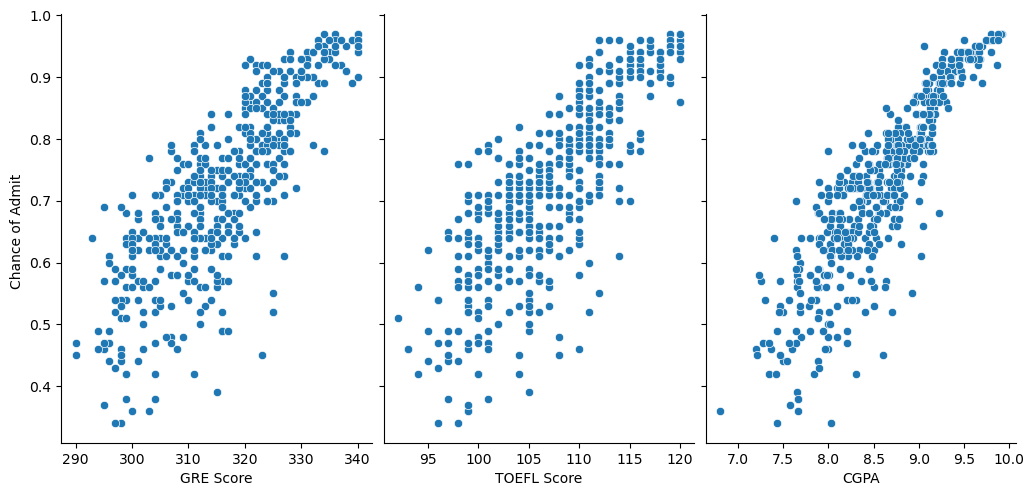

In [7]:
# 산점도 그리기
sns.pairplot(data, x_vars=['GRE Score', 'TOEFL Score', 'CGPA'], y_vars='Chance of Admit ', height=5, aspect=0.7)
plt.show()


## 이상치 탐지

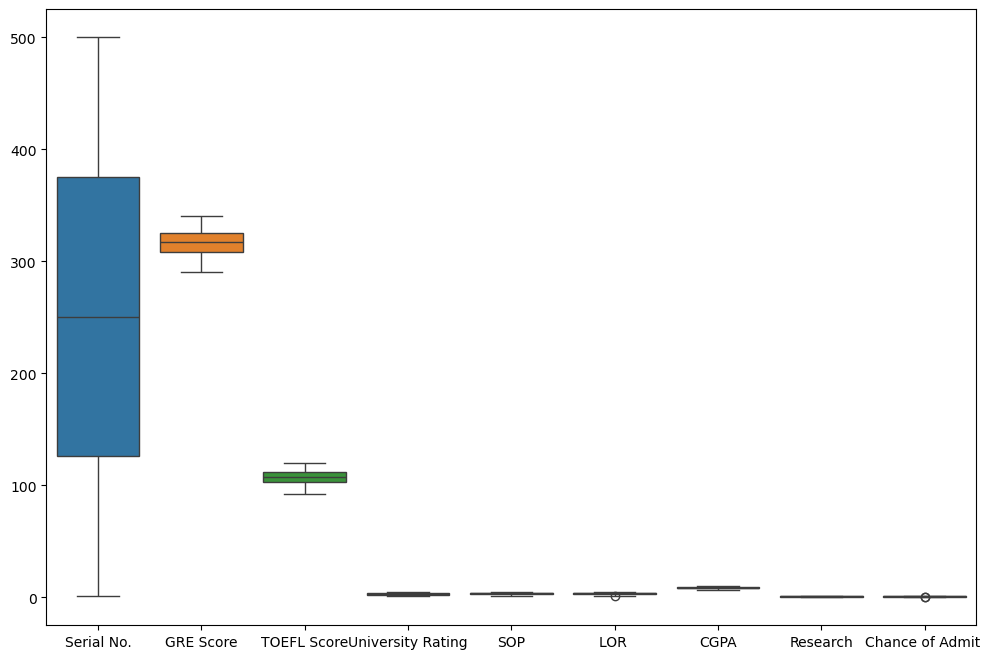

In [8]:
# 박스 플롯으로 이상치 탐지
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.show()


## 카테고리형 변수 분석

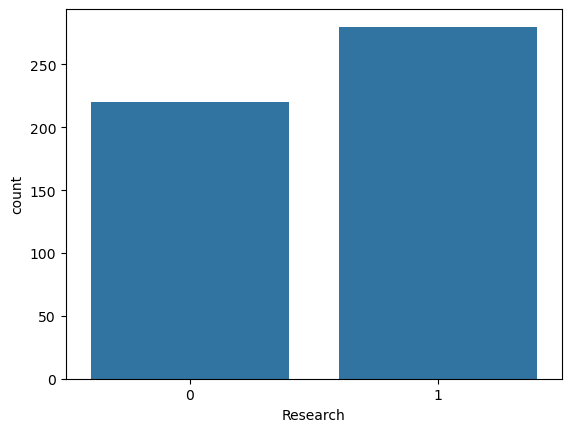

In [9]:
# 이진 변수의 분포 확인
sns.countplot(x='Research', data=data)
plt.show()

# 전처리

## Serial No 제거

In [11]:
data = data.drop(columns=['Serial No.'])
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


## 결측치 확인 및 처리

In [13]:
# 결측치 확인
missing_values = data.isnull().sum()
missing_values

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## 데이터 분할

In [15]:
# 특성과 타겟 변수 분리
X = data.drop(columns=['Chance of Admit '])
y = data['Chance of Admit ']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=12345)

# 모델 생성

In [17]:
model = RandomForestRegressor(random_state=12345)

# 모델 학습

In [18]:

model.fit(X_train,y_train)

RandomForestRegressor(random_state=12345)

# 예측 수행

In [19]:
y_pred = model.predict(X_test)

# 모델 평가

In [20]:
mes = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [21]:
print(mes, r2)

0.004367469933333332 0.7615054610665262


## 실제값과 예측값 비교 시각화(산점도)

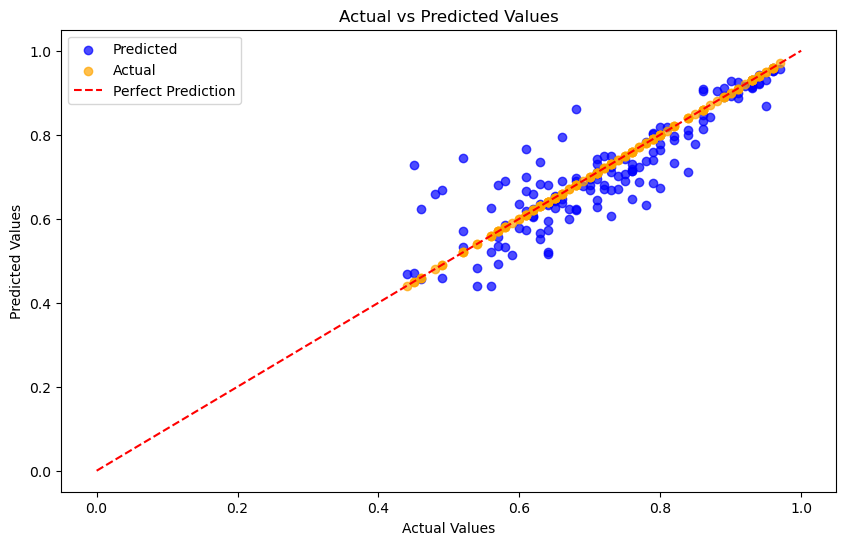

In [33]:
# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.7, color='orange', label='Actual')
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')  # 완벽한 예측을 의미하는 45도 선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


## 잔차 분석 시각화

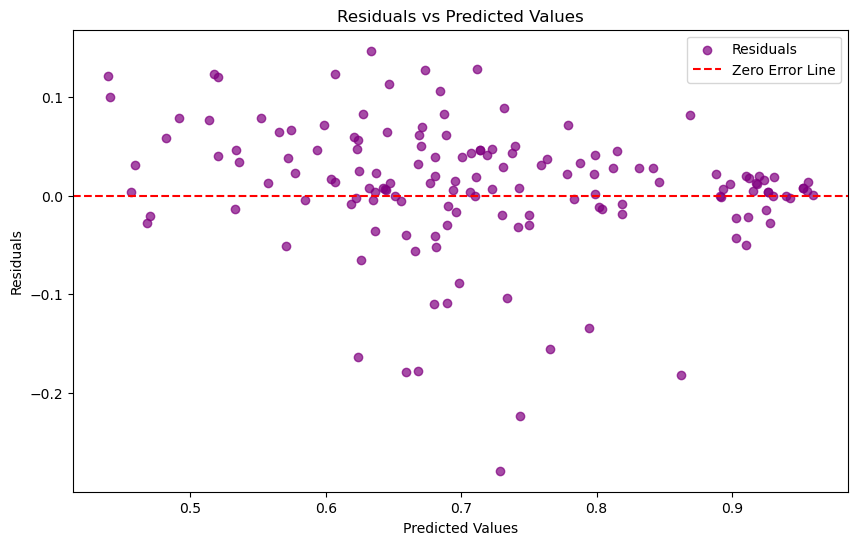

In [36]:
# 잔차 계산
residuals = y_test - y_pred

# 잔차 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.show()

## 특성 중요도 추출 및 정렬

In [25]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

## 중요도 시각화

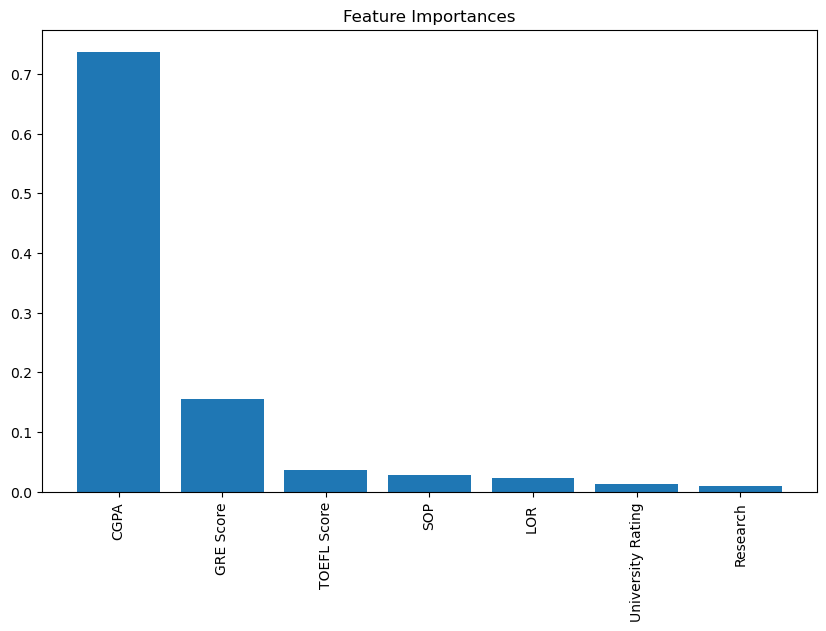

In [35]:
# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.show()